#  UpSetPlot

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet
import numpy as np
import datetime

In [15]:
date = datetime.datetime.now().strftime("%Y-%m-%d")

In [16]:
merged_df_blees_cpos_f99 = pd.read_csv('../output_dir/merged_df_blees_cpos_f99.tsv', sep = '\t')
merged_df_blees_cpos_f99.head()

,input_file_name,gene_symbol,gene_name,reference_database_name,reference_database_version,reference_accession,analysis_software_name,analysis_software_version,genetic_variation_type,antimicrobial_agent,...,reference_gene_stop,reference_protein_length,reference_protein_start,reference_protein_stop,resistance_mechanism,strand_orientation,sequence_identity,gene_symbol_modified,gene_type,Tool
0,A0101KPN,CTX_M_15,CTX_M_15.3001878.AY044436.1.1435_2311.1430,card,2.14.6,CTX_M_15.3001878.AY044436.1.1435_2311.1430,ariba,1.1.4,gene_presence_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.00,CTX_M_15,BLEE,ariba_CARD
1,A0101KPN,KPC_3,KPC_3.3002313.AF395881.1.0_882.1192,card,2.14.6,KPC_3.3002313.AF395881.1.0_882.1192,ariba,1.1.4,gene_presence_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.00,KPC_3,CPO,ariba_CARD
2,A0101KPN,SHV_28,SHV_28.3001086.AF299299.1.0_861.1946,card,2.14.6,SHV_28.3001086.AF299299.1.0_861.1946,ariba,1.1.4,gene_presence_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.88,SHV_28,BLEE,ariba_CARD
3,A0101KPN,TEM_90,TEM_90.3000957.AF351241.1.89_950.1804,card,2.14.6,TEM_90.3000957.AF351241.1.89_950.1804,ariba,1.1.4,gene_presence_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.77,TEM_90,BLEE,ariba_CARD
4,A0102KPN,OXA_48,OXA_48.3001782.AY236073.2.2187_2985.8249,card,2.14.6,OXA_48.3001782.AY236073.2.2187_2985.8249,ariba,1.1.4,gene_presence_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.00,OXA_48,CPO,ariba_CARD


In [17]:
merged_df_blees_cpos_f99['input_file_name'] = merged_df_blees_cpos_f99['input_file_name'].str.extract(r'([A-Z]\d{4})')

merged_df_blees_cpos_f99 = merged_df_blees_cpos_f99[['input_file_name', 'gene_symbol_modified', 'sequence_identity', 'Tool', 'gene_type']]

TOOL = 'amrfinderplus_NCBI'
merged_df_blees_cpos_f99 = merged_df_blees_cpos_f99[merged_df_blees_cpos_f99['Tool'] == TOOL]

merged_df_blees_cpos_f99.head()

,input_file_name,gene_symbol_modified,sequence_identity,Tool,gene_type
1454,A0101,CTX_M_15,100.0,amrfinderplus_NCBI,BLEE
1455,A0101,KPC_3,100.0,amrfinderplus_NCBI,CPO
1456,A0101,SHV_28,100.0,amrfinderplus_NCBI,BLEE
1457,A0101,TEM_1,100.0,amrfinderplus_NCBI,BLEE
1458,A0102,OXA_48,100.0,amrfinderplus_NCBI,CPO


In [18]:
input_genes_dict = {}
for sample in merged_df_blees_cpos_f99['input_file_name'].unique():
    sample_genes = merged_df_blees_cpos_f99[merged_df_blees_cpos_f99['input_file_name'] == sample]
    cpo_genes = sample_genes[sample_genes['gene_type'] == 'CPO']['gene_symbol_modified'].tolist()
    input_genes_dict[sample] = cpo_genes

input_genes_df = pd.DataFrame(input_genes_dict.items(), columns=['Sample', 'Genes'])
input_genes_df.head()

,Sample,Genes
0,A0101,[KPC_3]
1,A0102,[OXA_48]
2,A0103,[OXA_48]
3,A0104,[OXA_48]
4,A0105,"[KPC_3, OXA_48]"


In [19]:
# Convert list within column "Genes" to a boolean dataframe
bool_input_genes_df = input_genes_df.set_index('Sample')['Genes'].apply(lambda x: pd.Series({gene: True for gene in x})).fillna(False).astype(bool).reset_index()

# get all column names except Sample
cols = list(bool_input_genes_df.columns[1:])
bool_input_genes_df.set_index(cols, inplace=True)
bool_input_genes_df

/tmp/ipykernel_27354/2173324640.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_input_genes_df = input_genes_df.set_index('Sample')['Genes'].apply(lambda x: pd.Series({gene: True for gene in x})).fillna(False).astype(bool).reset_index()


Sample
KPC_3 OXA_48 VIM_1 NDM_23       
True  False  False False   A0101
False True   False False   A0102
                   False   A0103
                   False   A0104
True  True   False False   A0105
...                          ...
      False  False False   A1301
                   False   A1302
                   False   A1303
                   False   A1304
                   False   A1305

[82 rows x 1 columns]

In [20]:
# open on pandas csv ../antibiotics.csv
antibiotics = pd.read_csv('../antibiotics/antibiotics.csv').set_index("Cepa")
merged_df = pd.merge(bool_input_genes_df, antibiotics, left_on='Sample', right_index=True)
merged_df.head()

Sample  Imipenem  Meropenem  Ertapenem
KPC_3 OXA_48 VIM_1 NDM_23                                       
True  False  False False   A0101       8.0        8.0        2.0
False True   False False   A0102       2.0        2.0        2.0
                   False   A0103       2.0        4.0        2.0
                   False   A0104       2.0        2.0        2.0
True  True   False False   A0105       8.0        4.0        2.0

## UPSETPLOT

/home/carmen.martinez/Desktop/carmen/.conda/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/carmen.martinez/Desktop/carmen/.conda/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

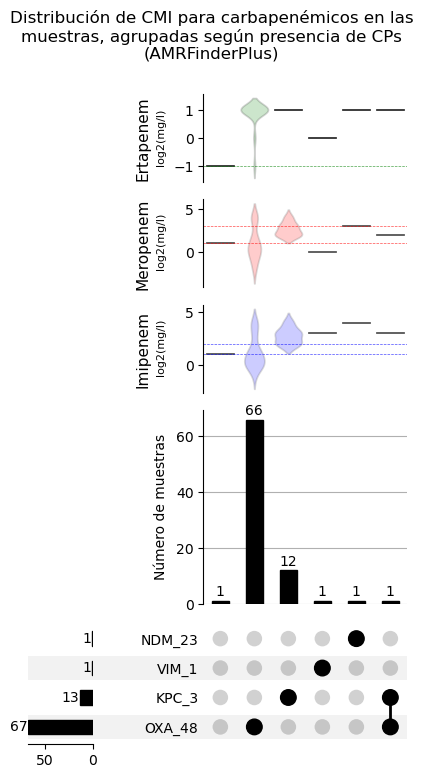

In [21]:

transformed_df = merged_df.copy()
transformed_df['Imipenem'] = np.log2(transformed_df['Imipenem'])
transformed_df['Meropenem'] = np.log2(transformed_df['Meropenem'])
transformed_df['Ertapenem'] = np.log2(transformed_df['Ertapenem'])


upset = UpSet(transformed_df, orientation='horizontal', show_counts=True)

# Add violin plots
upset.add_catplot(value='Imipenem', kind='violin', color='blue', facecolor='blue', alpha=0.2, **{"inner": None})
upset.add_catplot(value='Meropenem', kind='violin', color='red', facecolor='red', alpha=0.2, **{"inner": None})
upset.add_catplot(value='Ertapenem', kind='violin', color='green', facecolor='green', alpha=0.2, **{"inner": None})

result = upset.plot()

# Add horizontal threshold lines
fig = plt.gcf()
axes = fig.get_axes()

axes[-3].axhline(y=np.log2(2), color='blue', linestyle='--', linewidth=0.5, alpha=0.7)  # Imipenem
axes[-3].axhline(y=np.log2(4), color='blue', linestyle='--', linewidth=0.5, alpha=0.7)  # Imipenem

axes[-2].axhline(y=np.log2(2), color='red', linestyle='--', linewidth=0.5, alpha=0.7)  # Meropenem
axes[-2].axhline(y=np.log2(8), color='red', linestyle='--', linewidth=0.5, alpha=0.7)  # Meropenem

axes[-1].axhline(y=np.log2(0.5), color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Ertapenem



# Custom y-axis label with different font sizes
label1 = "Imipenem\n"
label2 = "log2(mg/l)"
axes[-3].set_ylabel(label1, fontsize=11)  # Larger text for the first line
axes[-3].text(
    -0.23, -1.55, label2, transform=axes[-1].transAxes, fontsize=8,
    verticalalignment='top', horizontalalignment='left', rotation=90
)

label1 = "Meropenem\n"
label2 = "log2(mg/l)"
axes[-2].set_ylabel(label1, fontsize=11)  # Larger text for the first line
axes[-2].text(
    -0.23, -0.35, label2, transform=axes[-1].transAxes, fontsize=8,
    verticalalignment='top', horizontalalignment='left', rotation=90
)

label1 = "Ertapenem\n"
label2 = "log2(mg/l)"
axes[-1].set_ylabel(label1, fontsize=11)  # Larger text for the first line
axes[-1].text(
    -0.23, 0.84, label2, transform=axes[-1].transAxes, fontsize=8,
    verticalalignment='top', horizontalalignment='left', rotation=90
)

# Hide Grid
axes[-3].grid(False)  # Imipenem
axes[-2].grid(False)  # Meropenem
axes[-1].grid(False)  # Ertapenem


result["intersections"].set_ylabel("Número de muestras")
result["intersections"].grid(True)
result["totals"].grid(False)

#Figure title
plt.suptitle('Distribución de CMI para carbapenémicos en las\nmuestras, agrupadas según presencia de CPs\n(AMRFinderPlus)', fontsize=12)

#plt.savefig(f'../output_dir/upsetplot_{TOOL}/' + date + 'upsetplot_carbapenems.svg', dpi=800, bbox_inches='tight')
#plt.savefig(f'../output_dir/upsetplot_{TOOL}/' + date + 'upsetplot_carbapenems.png', dpi=800, bbox_inches='tight')
plt.show()


Build the same violin plot, but for all antibiotics of interest.

In [49]:
merged_df_blees_cpos_f99 = pd.read_csv('../output_dir/merged_df_blees_cpos_f99.tsv', sep = '\t')
merged_df_blees_cpos_f99.head()
# rename testnames
merged_df_blees_cpos_f99['input_file_name'] = merged_df_blees_cpos_f99['input_file_name'].str.extract(r'([A-Z]\d{4})')

merged_df_blees_cpos_f99 = merged_df_blees_cpos_f99[['input_file_name', 'gene_symbol_modified', 'sequence_identity', 'Tool', 'gene_type']]

TOOL = 'amrfinderplus_NCBI'

merged_df_blees_cpos_f99 = merged_df_blees_cpos_f99[merged_df_blees_cpos_f99['Tool'] == TOOL]
merged_df_blees_cpos_f99.head()

input_genes_dict = {}
for sample in merged_df_blees_cpos_f99['input_file_name'].unique():
    sample_genes = merged_df_blees_cpos_f99[merged_df_blees_cpos_f99['input_file_name'] == sample]
    cpo_genes = sample_genes[sample_genes['gene_type'].isin(['BLEE', 'CPO'])]['gene_symbol_modified'].tolist()
    input_genes_dict[sample] = cpo_genes

# New dataframe with one kolumn as key of teh dictionary and other column as the value (its a list)
input_genes_df = pd.DataFrame(input_genes_dict.items(), columns=['Sample', 'Genes'])
input_genes_df.head()

# Convert list within column "Genes" to a boolean dataframe
bool_input_genes_df = input_genes_df.set_index('Sample')['Genes'].apply(lambda x: pd.Series({gene: True for gene in x})).fillna(False).astype(bool).reset_index()

# get all column names except Sample
cols = list(bool_input_genes_df.columns[1:])
bool_input_genes_df.set_index(cols, inplace=True)
bool_input_genes_df

# open on pandas csv ../antibiotics.csv
antibiotics = pd.read_csv('../antibiotics/antibiotics-BLEE.csv').set_index("Cepa")
merged_df = pd.merge(bool_input_genes_df, antibiotics, left_on='Sample', right_index=True)
merged_df.head()


/tmp/ipykernel_27237/3901894912.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_input_genes_df = input_genes_df.set_index('Sample')['Genes'].apply(lambda x: pd.Series({gene: True for gene in x})).fillna(False).astype(bool).reset_index()


Sample  \
CTX_M_15 KPC_3 SHV_28 TEM_1 OXA_48 SHV_11 TEM_30 SHV_1 CMY_2 VIM_1 NDM_23 SHV_12 SHV_36          
True     True  True   True  False  False  False  False False False False  False  False   A0101   
False    False True   False True   False  False  False False False False  False  False   A0102   
                                                                                 False   A0103   
                                                                                 False   A0104   
True     True  True   True  True   False  False  False False False False  False  False   A0105   

                                                                                         Gentamicina  \
CTX_M_15 KPC_3 SHV_28 TEM_1 OXA_48 SHV_11 TEM_30 SHV_1 CMY_2 VIM_1 NDM_23 SHV_12 SHV_36                
True     True  True   True  False  False  False  False False False False  False  False           8.0   
False    False True   False True   False  False  False False False False  False  False           8.0   
                                                                                 False           2.0   
                                                                                 False           1.0   
True     True  True   True  True   False  False  False False False False  False  False           8.0   

                                                                                         Ciprofloxacina  \
CTX_M_15 KPC_3 SHV_28 TEM_1 OXA_48 SHV_11 TEM_30 SHV_1 CMY_2 VIM_1 NDM_23 SHV_12 SHV_36                   
True     True  True   True  False  False  False  False False False False  False  False              2.0   
False    False True   False True   False  False  False False False False  False  False              2.0   
                                                                                 False              2.0   
                                                                                 False              2.0   
True     True  True   True  True   False  False  False False False False  False  False              2.0   

                                                                                         Amoxi-clav  \
CTX_M_15 KPC_3 SHV_28 TEM_1 OXA_48 SHV_11 TEM_30 SHV_1 CMY_2 VIM_1 NDM_23 SHV_12 SHV_36               
True     True  True   True  False  False  False  False False False False  False  False           64   
False    False True   False True   False  False  False False False False  False  False           64   
                                                                                 False           64   
                                                                                 False           64   
True     True  True   True  True   False  False  False False False False  False  False           64   

                                                                                         Ceftazidima  \
CTX_M_15 KPC_3 SHV_28 TEM_1 OXA_48 SHV_11 TEM_30 SHV_1 CMY_2 VIM_1 NDM_23 SHV_12 SHV_36                
True     True  True   True  False  False  False  False False False False  False  False          16.0   
False    False True   False True   False  False  False False False False  False  False           1.0   
                                                                                 False           1.0   
                                                                                 False           0.5   
True     True  True   True  True   False  False  False False False False  False  False          16.0   

                                                                                         Cefotaxima  \
CTX_M_15 KPC_3 SHV_28 TEM_1 OXA_48 SHV_11 TEM_30 SHV_1 CMY_2 VIM_1 NDM_23 SHV_12 SHV_36               
True     True  True   True  False  False  False  False False False False  False  False          8.0   
False    False True   False True   False  False  False False False False  False  False          4.0   
                                                           

/home/carmen.martinez/Desktop/carmen/.conda/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/carmen.martinez/Desktop/carmen/.conda/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

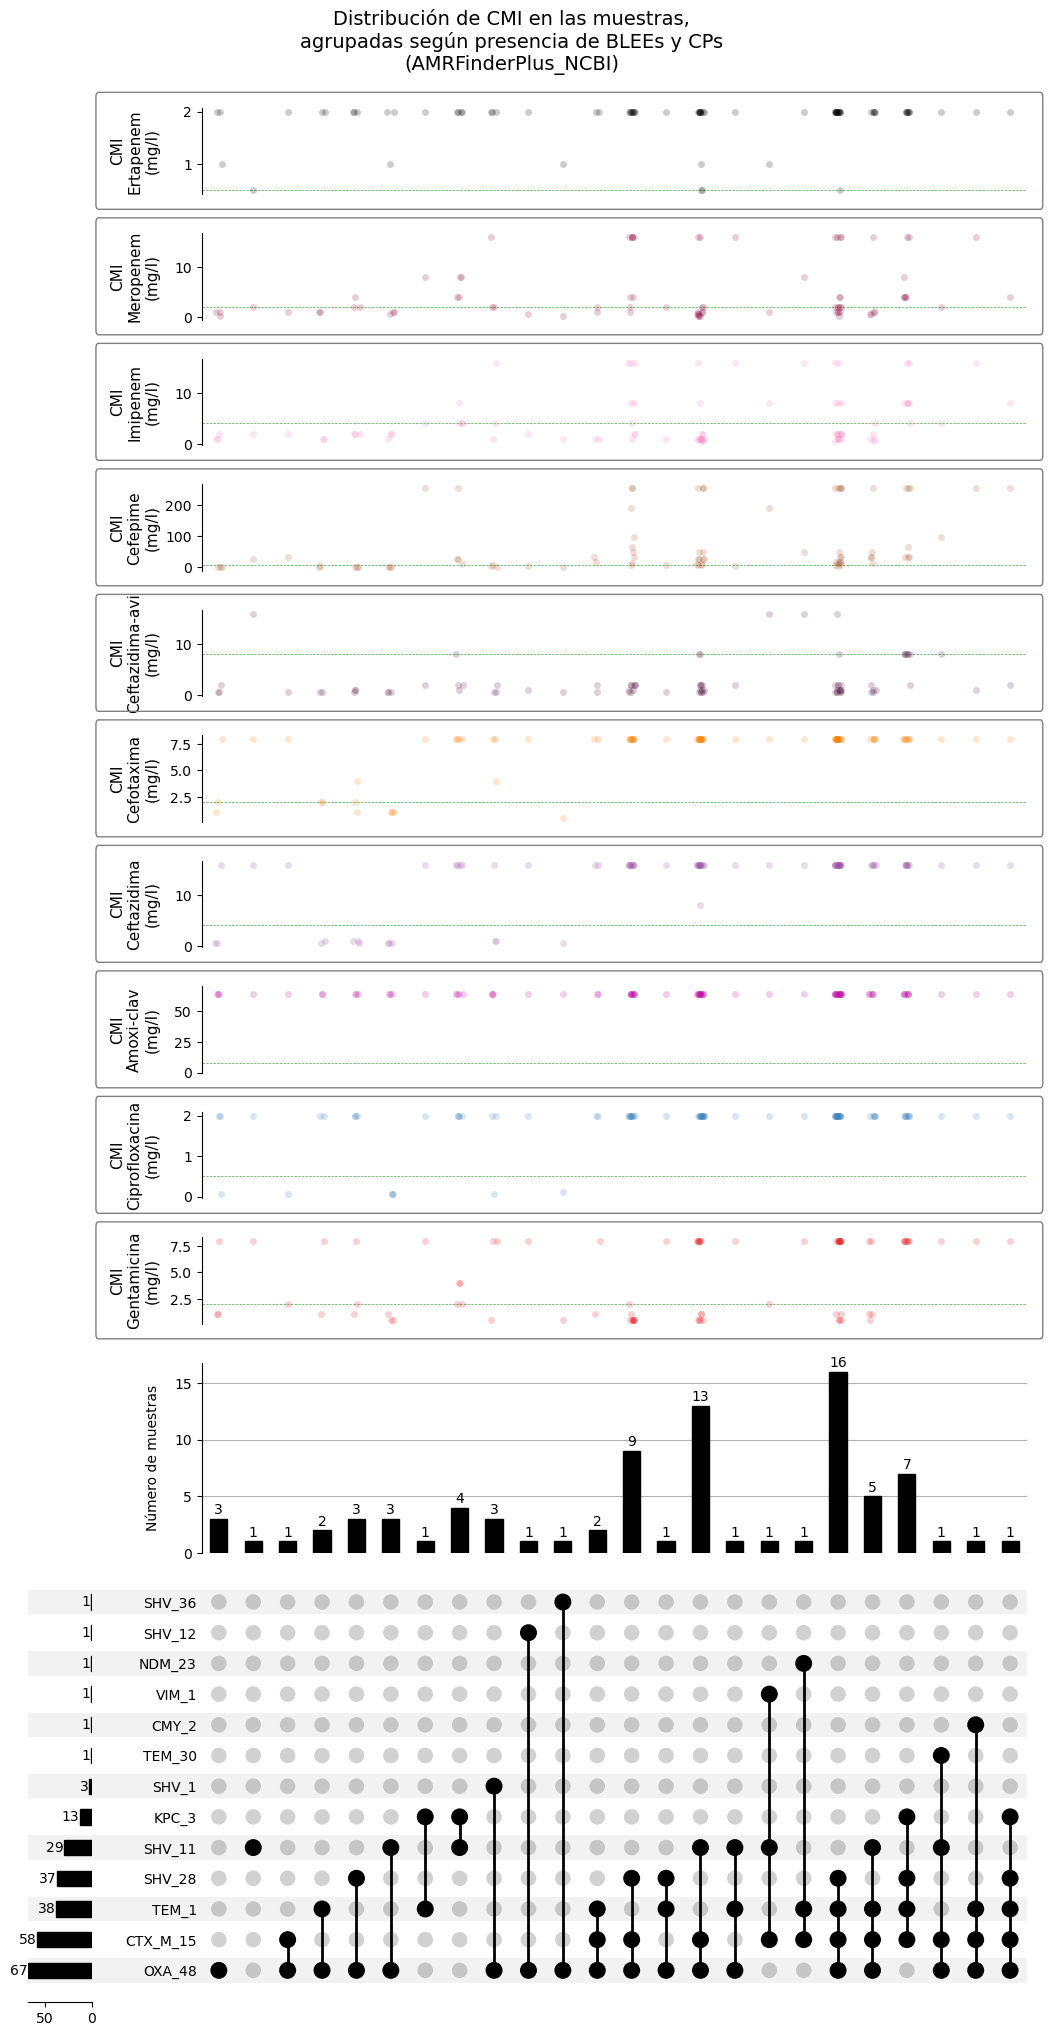

In [51]:
import matplotlib.patches as patches


transformed_df = merged_df.copy()

# Create the UpSet plot
upset = UpSet(transformed_df, orientation='horizontal', show_counts=True)

# Add catplots with custom styles
upset.add_catplot(value='Gentamicina', kind='strip', color='#e41a1c', facecolor='#e41a1c', alpha=0.2)
upset.add_catplot(value='Ciprofloxacina', kind='strip', color='#377eb8', facecolor='#377eb8', alpha=0.2)
upset.add_catplot(value='Amoxi-clav', kind='strip', color='#be06a2', facecolor='#be06a2', alpha=0.2)
upset.add_catplot(value='Ceftazidima', kind='strip', color='#984ea3', facecolor='#984ea3', alpha=0.2)
upset.add_catplot(value='Cefotaxima', kind='strip', color='#ff7f00', facecolor='#ff7f00', alpha=0.2)
upset.add_catplot(value='Ceftazidima-avi', kind='strip', color='#581845', facecolor='#581845', alpha=0.2)
upset.add_catplot(value='Cefepime', kind='strip', color='#a65628', facecolor='#a65628', alpha=0.2)
upset.add_catplot(value='Imipenem', kind='strip', color='#f781bf', facecolor='#f781bf', alpha=0.2)
upset.add_catplot(value='Meropenem', kind='strip', color='#900c3f', facecolor='#900c3f', alpha=0.2)
upset.add_catplot(value='Ertapenem', kind='strip', color='#000000', facecolor='#000000', alpha=0.2)

# Plot the UpSet plot
result = upset.plot()


fig.subplots_adjust(hspace=5)  # Adjusts the space between the catplots

# Retrieve all axes objects from the current figure
fig = plt.gcf()
axes = fig.get_axes()

# Add bounding boxes around the strip plots adjusting each Y coordinate accordingly
increment=0.01
for ax in axes[4:]:
    pos = ax.get_position()  # Get current position
    new_pos = [pos.x0, pos.y0 + increment, pos.width, pos.height]
    increment += 0.01
    ax.set_position(new_pos)
    pos2 = ax.get_position()  # Get new position
    box = patches.FancyBboxPatch(
        (pos2.x0-0.08, pos2.y0-0.005),  # (x, y) position of the lower left corner
        pos2.width+0.09,         # Width of the box
        pos2.height+0.01,        # Height of the box
        boxstyle="round,pad=0.002",
        edgecolor="gray",  # Box edge color
        facecolor="none",   # Box face color (transparent)
        lw=1                # Line width of the box edge
    )

    # Add the box to the figure
    fig.add_artist(box)
    label = ax.get_ylabel()
    ax.set_ylabel("CMI\n"+label+"\n(mg/l)", fontsize=11)



# Hide Grid
axes[-10].grid(False) # Gentamicina
axes[-9].grid(False)  # Ciprofloxacina
axes[-8].grid(False)  # Amoxi-clav
axes[-7].grid(False)  # Ceftazidima
axes[-6].grid(False)  # Cefotaxima
axes[-5].grid(False)  # Ceftazidima-avi
axes[-4].grid(False)  # Cefepime
axes[-3].grid(False)  # Imipenem
axes[-2].grid(False)  # Meropenem
axes[-1].grid(False)  # Ertapenem



# Show the plot with added horizontal lines that determine clinical breakpoints.
axes[-10].axhline(y=2, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Gentamicina
axes[-9].axhline(y=0.5, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Ciprofloxacina
axes[-8].axhline(y=8, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Amoxi-clav
axes[-7].axhline(y=4, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Ceftazidima
axes[-6].axhline(y=2, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Cefotaxima
axes[-5].axhline(y=8, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Ceftazidima-avi
axes[-4].axhline(y=4, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Cefepime
axes[-3].axhline(y=4, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Imipenem
axes[-2].axhline(y=2, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Meropenem
axes[-1].axhline(y=0.5, color='green', linestyle='--', linewidth=0.5, alpha=0.7)  # Ertapenem

# Adjust y-axis limits for Amoxi-clav plot
axes[-8].set_ylim(0, 70)

result["intersections"].set_ylabel("Número de muestras")
result["intersections"].grid(True)
result["totals"].grid(False)

#Figure title
plt.suptitle('Distribución de CMI en las muestras,\nagrupadas según presencia de BLEEs y CPs\n(AMRFinderPlus_NCBI)', fontsize=14, y=1.025)

#plt.savefig(f'../output_dir/upsetplot_{TOOL}/' + date + 'upsetplot_blee_cpos.svg', dpi=800, bbox_inches='tight')
#plt.savefig(f'../output_dir/upsetplot_{TOOL}/' + date + 'upsetplot_blee_cpos.png', dpi=800, bbox_inches='tight')

plt.show()